In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [86]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [81]:
data = pd.read_csv('dataset.csv', header = None)
print ('Veri şekli :',data.shape)
print(data.head())

Veri şekli : (100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


In [82]:
x_orig = data.iloc[:,1:-1].values
y_orig = data.iloc[:,-1:].values

print("Özellik matrixsi şekli : ", x_orig.shape)
print("Etiket vektörü şekli : ", y_orig.shape)

Özellik matrixsi şekli :  (100, 2)
Etiket vektörü şekli :  (100, 1)


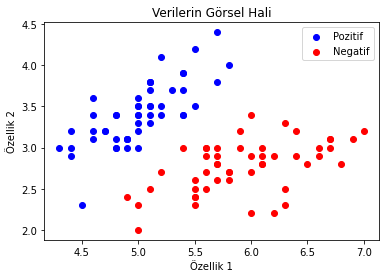

In [83]:
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 1])
x_neg = np.array([x_orig[i]for i in range(len(x_orig))
                                    if y_orig[i] == 0])

plt.scatter(x_pos[:,0], x_pos[:,1], color = 'blue', label= 'Pozitif')
plt.scatter(x_neg[:,0],x_neg[:,1], color = 'red', label = 'Negatif')

plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Verilerin Görsel Hali')
plt.legend()
plt.show()

In [84]:
oneHot = OneHotEncoder() 
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035,500
m,n = x.shape
print('m = ',m )
print('n = ',n)
print('Öğrenme Hızı = ',alpha)
print("Yenileme sayısı = ",epochs)


m =  100
n =  51
Öğrenme Hızı =  0.0035
Yenileme sayısı =  500


In [87]:
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32,[None,2])
W = tf.Variable(tf.zeros([n,2]))
b = tf.Variable(tf.zeros([2]))

In [88]:
from matplotlib.scale import LogisticTransform
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X,W),b))

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost)

init = tf.global_variables_initializer()

In [99]:
with tf.Session() as sess:
  sess.run(init)
  cost_history,accuracy_history = [],[]
  for epoch in range(epochs):
    cost_per_epoch = 0

    sess.run(optimizer, feed_dict = {X : x, Y : y})
    c = sess.run(cost, feed_dict = {X : x, Y : y})
    correct_prediction = tf.equal(tf.argmax(Y_hat,1),tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    cost_history.append(sum(sum(c)))
    accuracy_history.append(accuracy.eval({X : x, Y : y})*100)

    if epoch %100 == 0 and epoch != 0:
      print('Yineleme : '+str(epoch)+ ' Maliyet' + str(cost_history[-1]))
  Weight = sess.run(W)
  Bias = sess.run(b)

  correct_prediction = tf.equal(tf.argmax(Y_hat,1), tf.argmax(Y,1))

  accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

  print('\nKesinlik : ',accuracy_history[-1], '%')

Yineleme : 100 Maliyet136.33413696289062
Yineleme : 200 Maliyet132.68544006347656
Yineleme : 300 Maliyet129.77123260498047
Yineleme : 400 Maliyet127.2939567565918

Kesinlik :  87.00000047683716 %


Text(0.5, 1.0, 'Maliyet ve Yenileme Grafiği')

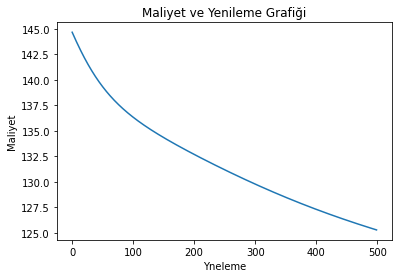

In [100]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Yneleme')
plt.ylabel('Maliyet')
plt.title('Maliyet ve Yenileme Grafiği')

Text(0.5, 1.0, 'Kesinlik ve Yineleme Grefiği')

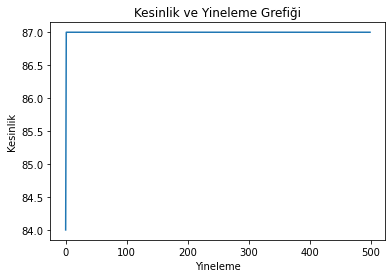

In [101]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Yineleme')
plt.ylabel('Kesinlik')
plt.title("Kesinlik ve Yineleme Grefiği")

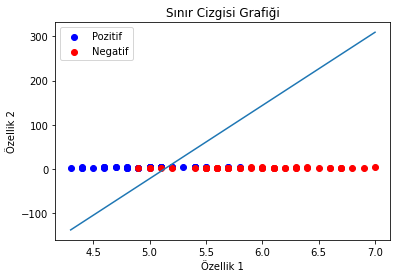

In [103]:
decision_boundary_x = np.array([np.min(x_orig[:,0]),
                                np.max(x_orig[:,0])])

decision_boundary_y = (-1.0/ Weight[0]) * (decision_boundary_x*Weight + Bias) 
decision_boundary_y = [sum(decision_boundary_y[:,0]),
                       sum(decision_boundary_y[:,1])]

x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 1])

x_neg = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 0])

plt.scatter(x_pos[:,0], x_pos[:, 1],
            color = 'blue', label = 'Pozitif')

plt.scatter(x_neg[:,0], x_neg[:, 1],
            color = 'red', label = 'Negatif')
plt.plot(decision_boundary_x,decision_boundary_y)
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Sınır Cizgisi Grafiği')
plt.legend()
plt.show()